<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/9%20LINEAR%20REGRESSION/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import packages yanng diperlukan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Membaca Data

In [ ]:
df = pd.read_csv("happines2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Eksplorasi Data

In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
new_names = {'Social support':'social_suport', 'Healthy life expectancy':'healthy_life_expectancy', 'GDP per capita':'GDP_per_capita', 'Freedom to make life choices':'Freedom_to_make_life_choices'}

In [ ]:
df.rename(columns=new_names, inplace=True)
df.head()

,Overall rank,Country or region,Score,GDP_per_capita,social_suport,healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
cdf = df[['Score', 'social_suport', 'healthy_life_expectancy', 'GDP_per_capita', 'Freedom_to_make_life_choices']]
cdf.head(10)

,Score,social_suport,healthy_life_expectancy,GDP_per_capita,Freedom_to_make_life_choices
0,7.769,1.587,0.986,1.340,0.596
1,7.600,1.573,0.996,1.383,0.592
2,7.554,1.582,1.028,1.488,0.603
3,7.494,1.624,1.026,1.380,0.591
4,7.488,1.522,0.999,1.396,0.557
5,7.480,1.526,1.052,1.452,0.572
6,7.343,1.487,1.009,1.387,0.574
7,7.307,1.557,1.026,1.303,0.585
8,7.278,1.505,1.039,1.365,0.584
9,7.246,1.475,1.016,1.376,0.532


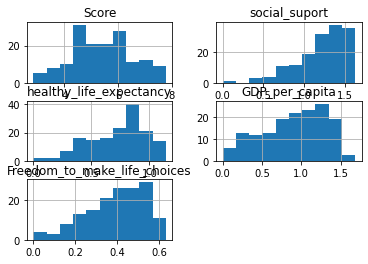

In [ ]:
viz = cdf[['Score', 'social_suport', 'healthy_life_expectancy', 'GDP_per_capita', 'Freedom_to_make_life_choices']]
viz.hist()
plt.show()

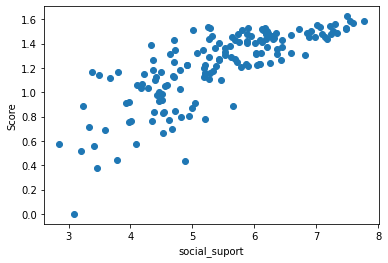

In [ ]:
plt.scatter(cdf.Score, cdf.social_suport)
plt.xlabel("social_suport")
plt.ylabel("Score")
plt.show()

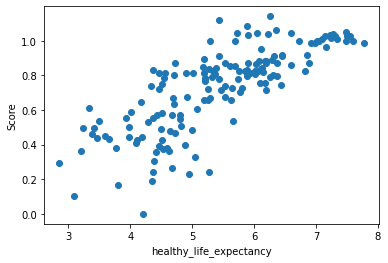

In [ ]:
plt.scatter(cdf.Score, cdf.healthy_life_expectancy)
plt.xlabel("healthy_life_expectancy")
plt.ylabel("Score")
plt.show()

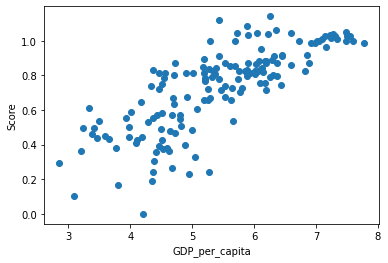

In [ ]:
plt.scatter(cdf.Score, cdf.healthy_life_expectancy)
plt.xlabel("GDP_per_capita")
plt.ylabel("Score")
plt.show()

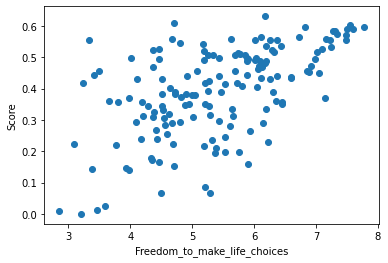

In [ ]:
plt.scatter(cdf.Score, cdf.Freedom_to_make_life_choices)
plt.xlabel("Freedom_to_make_life_choices")
plt.ylabel("Score")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Score']])
train_y = np.asanyarray(train[['social_suport']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.2199881]]
Intercept:  [0.01557471]


Text(0, 0.5, 'Score')

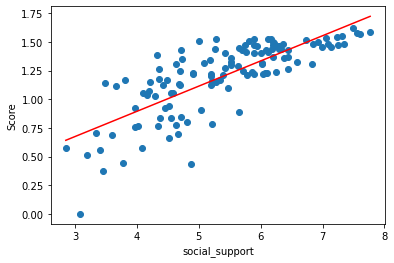

In [ ]:
plt.scatter(train.Score, train.social_suport)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("social_support")
plt.ylabel("Score")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['social_suport']])
test_y = np.asanyarray(test[['Score']])
test_y_ = regr.predict(test_x)

mae  = np.mean(np.absolute(test_y_ - test_y))
mse  = np.mean((test_y_ - test_y) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.absolute((test_y_ - test_y)/test_y_))

print("Mean absolute error (MAE): %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("Mean Precentage Absolute Error (MAPE): %.2f" % mape)
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error (MAE): 5.17
Residual sum of squares (MSE): 27.89
Root Mean Squared Error (RMSE): 5.28
Mean Precentage Absolute Error (MAPE): 18.11
R2-score: -10035.76
